In [3]:
import random
import numpy as np

furcation = [random.randint(0, 3) for _ in range(10000)]
implant = [random.choice([0, 1]) for _ in range(10000)]
mobility = [random.randint(0, 3) for _ in range(10000)]
bleeding_on_probing = [random.choice([0, 1]) for _ in range(10000)]
plaque = [random.randint(0, 3) for _ in range(10000)]
gingival_margin = [random.randint(-10, 4) for i in range(10000)]
probing_depth = [round(random.uniform(1, 10), 1) for _ in range(10000)]
CAL = [pd - gm for pd, gm in zip(probing_depth, gingival_margin)]


In [4]:
import pandas as pd
# Assuming your simulated data is stored in lists `field1`, `field2`, etc.
data = {
    'probing depth': probing_depth,
    'mobility': mobility,
    'furcation': furcation,
    'implant': implant, 
    'Bleeding on probing': bleeding_on_probing,
    'plaque': plaque, 
    'gingival_margin': gingival_margin,
    'Clinical Attachment Level': CAL
    # Add more fields as necessary
}

df = pd.DataFrame(data)
df
df.to_excel('simulated_data.xlsx', index=False)


In [6]:
import pandas as pd
input = "simulated_data.xlsx"
data= pd.read_excel(input)
data

,probing depth,mobility,furcation,implant,Bleeding on probing,plaque,gingival_margin,Clinical Attachment Loss
0,6.0,2,2,1,1,1,-2,8.0
1,5.0,0,1,1,1,1,-4,9.0
2,2.0,0,0,1,0,0,2,0.0
3,3.0,0,0,0,0,0,1,2.0
4,5.0,2,3,1,1,3,-3,8.0
...,...,...,...,...,...,...,...,...
9993,3.3,0,0,0,1,1,0,3.3
9994,2.2,1,0,0,0,0,3,-0.8
9995,1.8,2,0,1,1,1,-4,5.8
9996,2.6,3,1,0,1,1,4,-1.4


In [6]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Number of subjects
total_subjects = 400

# Define the number of subjects for each caries stage
num_stage_0_1 = total_subjects // 6  # Equal distribution for stage 0 and 1
num_stage_2 = num_stage_0_1
num_stage_3 = 2 * num_stage_0_1  # Highest for stage 3
num_stage_4 = num_stage_0_1  # Equal distribution for stage 4
num_stage_5_6 = num_stage_0_1  # Equal distribution for stage 5 and 6

# Generate "current caries stage" data based on the specified numbers
caries_stage = [0] * num_stage_0_1 + [1] * num_stage_0_1 + [2] * num_stage_2 + [3] * num_stage_3 + [4] * num_stage_4 + [5] * num_stage_5_6 + [6] * num_stage_5_6

# Shuffle the caries_stage list to randomize the order
np.random.shuffle(caries_stage)

# Create an empty list to store "hollow tooth after 6 months" data
hollow_tooth = []

# Generate "hollow tooth after 6 months" data based on "current caries stage"
for stage in caries_stage:
    if stage in [0, 1]:
        hollow_tooth.append(0)
    elif stage in [5, 6]:
        hollow_tooth.append(1)
    else:
        # For stage 2, 3, and 4, you can set the proportion as needed
        if stage == 2:
            prob = 0.5
        elif stage == 3:
            prob = 0.9
        else:
            prob = 0.5  # Stage 4
        value = np.random.choice([0, 1], p=[1 - prob, prob])
        hollow_tooth.append(value)

# Create a DataFrame
data = pd.DataFrame({'current caries stage': caries_stage, 'hollow tooth after 6 months': hollow_tooth})

# Save the DataFrame to an Excel file
data.to_excel('caries data.xlsx', index=False)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_excel('caries data.xlsx')

# Split the dataset into features (X) and the target (y)
X = data[['current caries stage']]
y = data['hollow tooth after 6 months']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model and fit it to the training data
model = SVC(kernel='linear', C=1)  # You can choose different kernels and C values
model.fit(X_train, y_train)

# Make predictions using the trained model on the test data
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.80


In [ ]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Number of subjects
total_subjects = 400

# Define the number of subjects for each caries stage
num_stage_0_1 = total_subjects // 6  # Equal distribution for stage 0 and 1
num_stage_2 = num_stage_0_1
num_stage_3 = 2 * num_stage_0_1  # Highest for stage 3
num_stage_4 = num_stage_0_1  # Equal distribution for stage 4
num_stage_5_6 = num_stage_0_1  # Equal distribution for stage 5 and 6

# Generate "current caries stage" data based on the specified numbers
caries_stage = [0] * num_stage_0_1 + [1] * num_stage_0_1 + [2] * num_stage_2 + [3] * num_stage_3 + [4] * num_stage_4 + [5] * num_stage_5_6 + [6] * num_stage_5_6

# Shuffle the caries_stage list to randomize the order
np.random.shuffle(caries_stage)

# Create an empty list to store "endo" data
endo = []

# Generate "endo" data based on "current caries stage"
for stage in caries_stage:
    if stage in [0, 1]:
        endo.append(0)
    elif stage in [5, 6]:
        endo.append(1)
    else:
        # For stage 2, 3, and 4, you can set the proportion as needed
        if stage == 2:
            prob = 0.5
        elif stage == 3:
            prob = 0.9
        else:
            prob = 0.5  # Stage 4
        value = np.random.choice([0, 1], p=[1 - prob, prob])
        endo.append(value)

# Create a DataFrame with "current caries stage" and "endo" columns
data = pd.DataFrame({'current caries stage': caries_stage, 'endo': endo})

# Save the DataFrame to an Excel file
data.to_excel('caries data_with_endo.xlsx', index=False)


In [1]:
import pandas as pd
import numpy as np

# Load the data from the Excel file
df = pd.read_excel('simulated_data.xlsx')

# Select the rows with probing depth equal to 3 or 4
selected_rows = df[df['probing depth'].isin([3, 4])]

# Generate random values for "gingivitis" based on a normal distribution
mean_gingivitis = 0.5  # Adjust mean as needed
std_dev_gingivitis = 0.1  # Adjust standard deviation as needed

# Generate values following a normal distribution between 0 and 1
gingivitis_values = np.random.normal(mean_gingivitis, std_dev_gingivitis, len(selected_rows))

# Convert the generated values to 0 (no gingivitis) or 1 (gingivitis) based on a threshold
threshold = 0.5  # Adjust the threshold as needed
gingivitis_values = (gingivitis_values > threshold).astype(int)

# Assign the converted values to the "gingivitis" column for the selected rows
selected_rows['gingivitis'] = gingivitis_values

# Update the original DataFrame with the changes
df.update(selected_rows)

# Save the updated data back to the Excel file
df.to_excel('simulated_excel_file.xlsx', index=False)


C:\Users\hazem\AppData\Local\Temp\ipykernel_5388\3012372407.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['gingivitis'] = gingivitis_values


C:\Users\hazem\AppData\Local\Temp\ipykernel_5388\1229713675.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['gingivitis'] = gingivitis_values


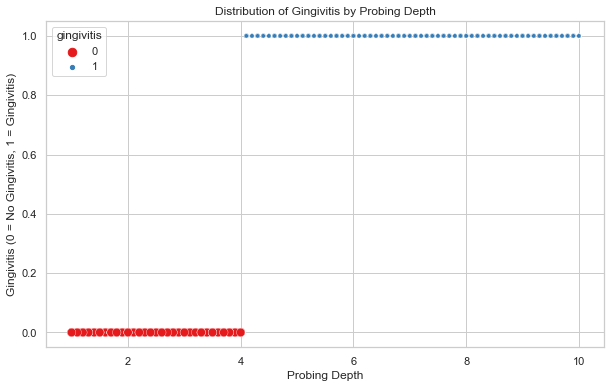

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
df = pd.read_excel('simulated_data.xlsx')

# Select the rows with probing depth equal to 3 or 4
selected_rows = df[df['probing depth'].isin([3, 4])]

# Generate random values for "gingivitis" based on a normal distribution
mean_gingivitis = 0.5  # Adjust mean as needed
std_dev_gingivitis = 0.1  # Adjust standard deviation as needed

# Generate values following a normal distribution between 0 and 1
gingivitis_values = np.random.normal(mean_gingivitis, std_dev_gingivitis, len(selected_rows))

# Convert the generated values to 0 (no gingivitis) or 1 (gingivitis) based on a threshold
threshold = 0.5  # Adjust the threshold as needed
gingivitis_values = (gingivitis_values > threshold).astype(int)

# Assign the converted values to the "gingivitis" column for the selected rows
selected_rows['gingivitis'] = gingivitis_values

# Populate the rest of the DataFrame based on the probing depth rule
df['gingivitis'] = 0  # Default to 0 for all rows
df.loc[df['probing depth'] < 3, 'gingivitis'] = 0
df.loc[df['probing depth'] > 4, 'gingivitis'] = 1

# Create a plot to visualize the data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='probing depth', y='gingivitis', hue='gingivitis', size='gingivitis', palette='Set1')

# Save the updated data back to the Excel file
df.to_excel('your_updated_excel_file.xlsx', index=False)

# Show the plot
plt.xlabel("Probing Depth")
plt.ylabel("Gingivitis (0 = No Gingivitis, 1 = Gingivitis)")
plt.title("Distribution of Gingivitis by Probing Depth")
plt.show()
